# Convolutional Neural Network

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [17]:
def create_cnn(X_shape, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=X_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(rate=dropout_rate))
    
    model.add(Dense(5)) # We have 5 classifications.
    model.add(Activation('softmax'))
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='rmsprop', # Could also try 'sgd'
        metrics=['accuracy']
    )
    
    return model    

In [25]:
# Parameters to set:
X_shape = (288, 432, 3)
dropout_rate = 0.5
batch_size = 16

In [26]:
# Set up data generators.

train_augmenter = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True
)

train_generator = train_augmenter.flow_from_directory(
    'testtrain_cnn/train_data',
    target_size=(288, 432),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'testtrain_cnn/test_data',
    target_size=(288, 432),
    batch_size=batch_size,
    class_mode='categorical')

Found 274 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [27]:
cnn = create_cnn(X_shape, dropout_rate)

In [29]:
cnn.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=50,
    validation_data=test_datagen,
    validation_steps=800 // batch_size
)
cnn.save_weights('cnn_models/first_try.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
18/18 [==============================] - 24s 1s/step - loss: 2.7946 - acc: 0.2774 - val_loss: 1.6168 - val_acc: 0.1900
Epoch 2/50
18/18 [==============================] - 24s 1s/step - loss: 1.5045 - acc: 0.3394 - val_loss: 1.5550 - val_acc: 0.3000
Epoch 3/50
18/18 [==============================] - 24s 1s/step - loss: 1.5527 - acc: 0.3686 - val_loss: 1.4935 - val_acc: 0.2800
Epoch 4/50
18/18 [==============================] - 24s 1s/step - loss: 1.4233 - acc: 0.4088 - val_loss: 1.7132 - val_acc: 0.2700
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 1.4811 - acc: 0.3942 - val_loss: 1.4838 - val_acc: 0.2500
Epoch 6/50
18/18 [==============================] - 24s 1s/step - loss: 1.3879 - acc: 0.4380 - val_loss: 1.3692 - val_acc: 0.4500
Epoch 7/50
18/18 [==============================] - 24s 1s/step - loss: 1.3263 - acc: 0.4489 - val_loss: 1.3149 - val_acc: 0.4600
Epoch 8/50
18/18 [========================

18/18 [==============================] - 24s 1s/step - loss: 0.0498 - acc: 0.9818 - val_loss: 0.8663 - val_acc: 0.8600
Epoch 39/50
18/18 [==============================] - 24s 1s/step - loss: 0.0778 - acc: 0.9818 - val_loss: 0.5840 - val_acc: 0.8900
Epoch 40/50
18/18 [==============================] - 24s 1s/step - loss: 0.0710 - acc: 0.9672 - val_loss: 0.5342 - val_acc: 0.8600
Epoch 41/50
18/18 [==============================] - 24s 1s/step - loss: 0.0873 - acc: 0.9672 - val_loss: 0.9923 - val_acc: 0.8200
Epoch 42/50
18/18 [==============================] - 26s 1s/step - loss: 0.1169 - acc: 0.9745 - val_loss: 1.0242 - val_acc: 0.8300
Epoch 43/50
18/18 [==============================] - 24s 1s/step - loss: 0.0424 - acc: 0.9927 - val_loss: 0.8861 - val_acc: 0.8400
Epoch 44/50
18/18 [==============================] - 24s 1s/step - loss: 0.1500 - acc: 0.9635 - val_loss: 0.6712 - val_acc: 0.8400
Epoch 45/50
18/18 [==============================] - 24s 1s/step - loss: 0.0278 - acc: 0.9927 -

In [35]:
cnn.save('cnn_models/first_model.h5', overwrite=True)

In [3]:
model = load_model('cnn_models/first_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [48]:
cnn.history.history

{'loss': [2.807036885379875,
  1.5005685586998934,
  1.5607523987763119,
  1.4176712767051085,
  1.4853734517619557,
  1.3738460958439067,
  1.3192734248446722,
  1.272349945820161,
  1.1850737511676595,
  1.1102743949333247,
  1.1176450587537168,
  1.0257214116354059,
  0.8500201232241889,
  0.7093249089254515,
  0.5944084094388642,
  0.5413758071397778,
  0.4568462442525112,
  0.4348300121126384,
  0.35400944078055613,
  0.26475843254232057,
  0.2601720911525462,
  0.2521715195421265,
  0.15072003464438838,
  0.17202728786539748,
  0.14735747194968132,
  0.11149648790659653,
  0.10961892220606334,
  0.09350638495363893,
  0.13667373881287828,
  0.12223341073976816,
  0.11866719487811696,
  0.17030594459850754,
  0.1220185988766216,
  0.07881882501236176,
  0.10308176393587318,
  0.0839314486343725,
  0.18526777124073165,
  0.052219494419318,
  0.08156331371257666,
  0.07447924808945114,
  0.09113465223706117,
  0.1103488267458853,
  0.044457109138878556,
  0.15716078376353304,
  0.02

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_models/first_model.jpg')

In [1]:
history = {'loss': [2.807036885379875,
  1.5005685586998934,
  1.5607523987763119,
  1.4176712767051085,
  1.4853734517619557,
  1.3738460958439067,
  1.3192734248446722,
  1.272349945820161,
  1.1850737511676595,
  1.1102743949333247,
  1.1176450587537168,
  1.0257214116354059,
  0.8500201232241889,
  0.7093249089254515,
  0.5944084094388642,
  0.5413758071397778,
  0.4568462442525112,
  0.4348300121126384,
  0.35400944078055613,
  0.26475843254232057,
  0.2601720911525462,
  0.2521715195421265,
  0.15072003464438838,
  0.17202728786539748,
  0.14735747194968132,
  0.11149648790659653,
  0.10961892220606334,
  0.09350638495363893,
  0.13667373881287828,
  0.12223341073976816,
  0.11866719487811696,
  0.17030594459850754,
  0.1220185988766216,
  0.07881882501236176,
  0.10308176393587318,
  0.0839314486343725,
  0.18526777124073165,
  0.052219494419318,
  0.08156331371257666,
  0.07447924808945114,
  0.09113465223706117,
  0.1103488267458853,
  0.044457109138878556,
  0.15716078376353304,
  0.029156334996886253,
  0.05215870466484369,
  0.052249113167466145,
  0.12447387667507295,
  0.06365334588301837,
  0.03005895189546647],
 'acc': [0.27737227,
  0.33941606,
  0.36861312,
  0.40875912,
  0.3941606,
  0.4379562,
  0.4489051,
  0.48175183,
  0.47810218,
  0.56569344,
  0.5109489,
  0.620438,
  0.7007299,
  0.70437956,
  0.7919708,
  0.79562044,
  0.80656934,
  0.8211679,
  0.84671533,
  0.91240877,
  0.90510947,
  0.9160584,
  0.9489051,
  0.9270073,
  0.94160587,
  0.959854,
  0.95620435,
  0.9671533,
  0.95255476,
  0.9671533,
  0.9671533,
  0.96350366,
  0.94525546,
  0.9671533,
  0.96350366,
  0.9781022,
  0.9379562,
  0.9817518,
  0.9817518,
  0.9671533,
  0.9671533,
  0.97445256,
  0.99270076,
  0.96350366,
  0.99270076,
  0.9781022,
  0.9817518,
  0.96350366,
  0.9781022,
  0.98540145],
 'val_loss': [1.6167952503476823,
  1.5550040347235543,
  1.493482061794826,
  1.7132247175489153,
  1.483785663332258,
  1.3691767965044295,
  1.3149452209472656,
  1.2590726954596383,
  1.4134337391172136,
  1.2401506730488367,
  1.0514096106801714,
  0.9993231977735247,
  0.9238997101783752,
  0.848138553755624,
  0.6523171876158033,
  0.5930016338825226,
  0.7005172073841095,
  0.6957401590687888,
  0.5570154679673058,
  0.5095912728990827,
  0.5550541824528149,
  0.6231662375586373,
  0.583652892283031,
  0.492398093853678,
  0.7937452409948621,
  0.867397312607084,
  0.5520347165209907,
  0.7313754856586456,
  0.5651533165946603,
  0.6678959450551442,
  0.5424271813327712,
  0.7903848545891898,
  0.6942617939452508,
  1.0498608563627516,
  0.7025776335171291,
  0.9242522856885833,
  0.6401735227887652,
  0.8662694612784045,
  0.5839840939401516,
  0.534176360017487,
  0.992250396288,
  1.0241587002362524,
  0.8860912695527077,
  0.6711568385362625,
  0.9302567371300289,
  1.1852063238620758,
  1.247637822159699,
  0.8933721142155784,
  1.115479541676385,
  1.297583362885884],
 'val_acc': [0.19,
  0.3,
  0.28,
  0.27,
  0.25,
  0.45,
  0.46,
  0.48,
  0.39,
  0.43,
  0.62,
  0.67,
  0.6,
  0.69,
  0.69,
  0.76,
  0.74,
  0.74,
  0.82,
  0.81,
  0.82,
  0.82,
  0.83,
  0.8,
  0.83,
  0.82,
  0.81,
  0.82,
  0.85,
  0.82,
  0.86,
  0.79,
  0.84,
  0.79,
  0.82,
  0.79,
  0.84,
  0.86,
  0.89,
  0.86,
  0.82,
  0.83,
  0.84,
  0.84,
  0.83,
  0.77,
  0.83,
  0.85,
  0.81,
  0.81]}

In [14]:
plt.rcParams["figure.dpi"] = 400        # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3) # Change plot size / aspect (you may adjust this).

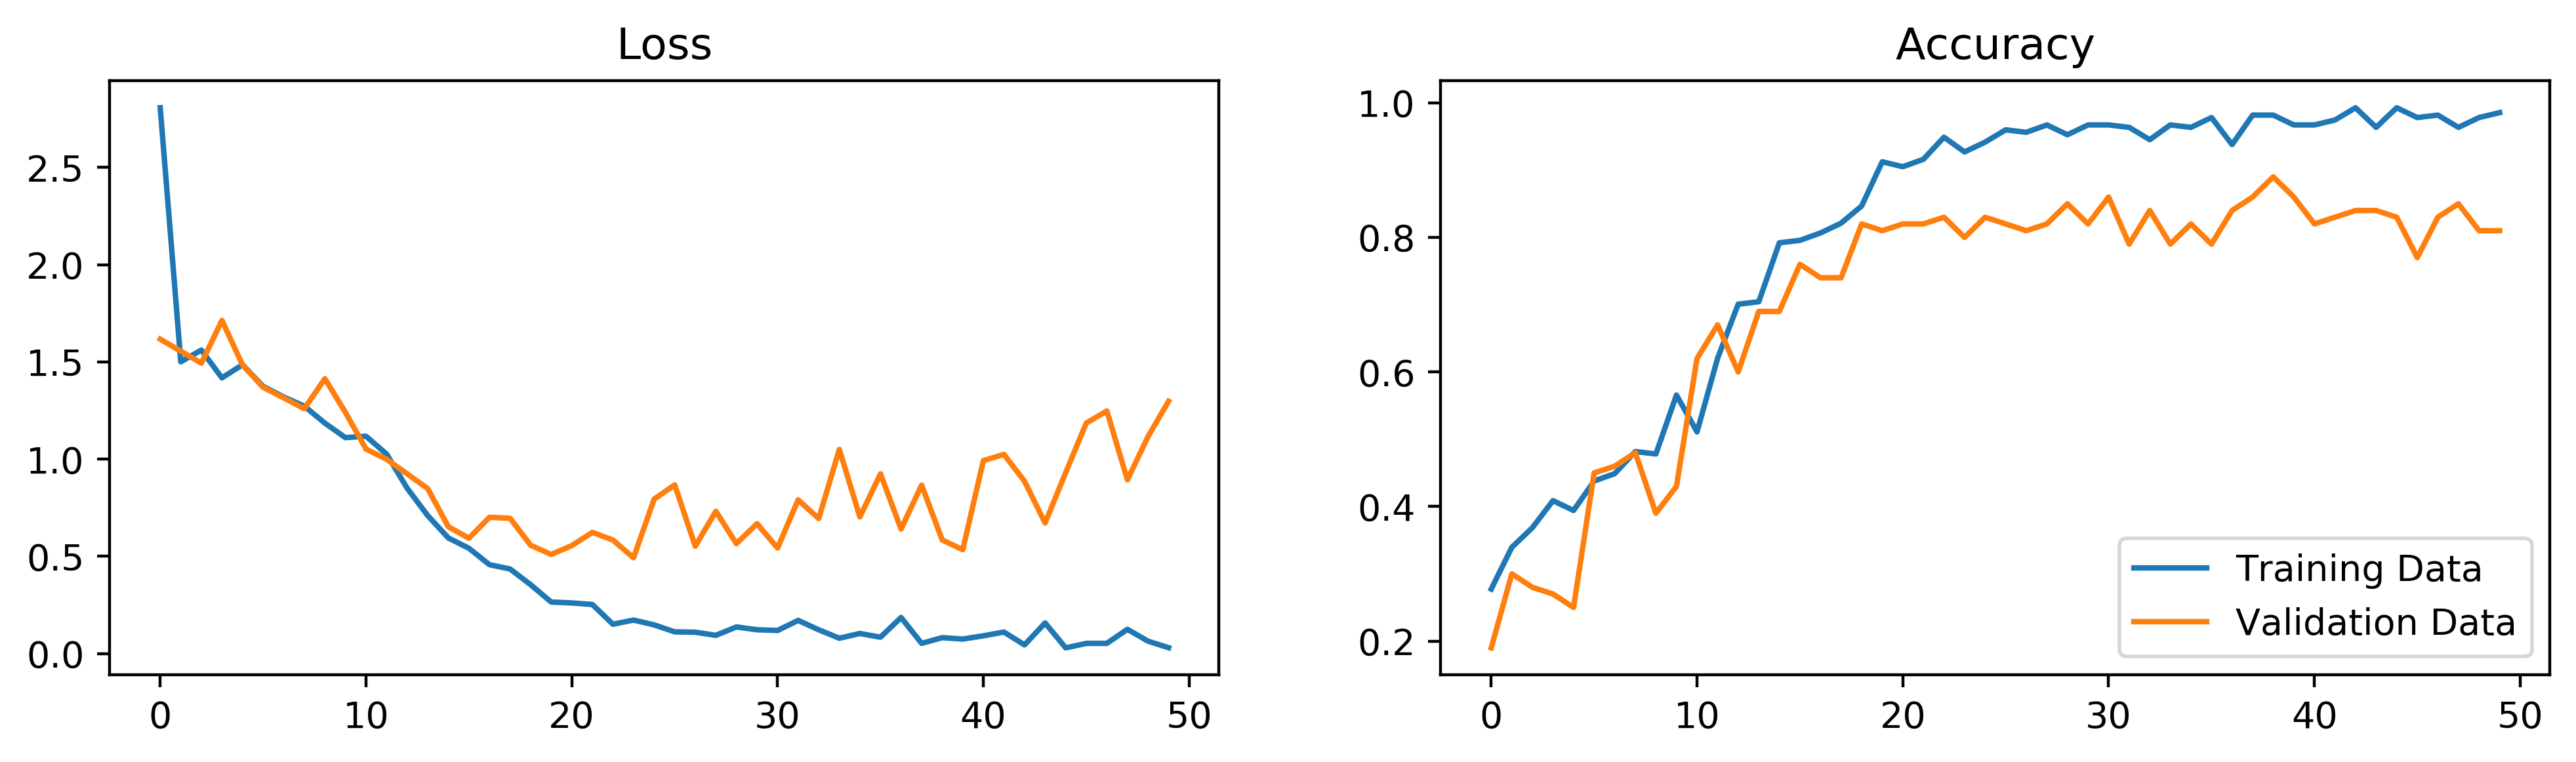

In [21]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(history['loss'], label='Training Data')
plt.plot(history['val_loss'],label='Validation Data')
#plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history['acc'], label='Training Data')
plt.plot(history['val_acc'], label='Validation Data')
plt.legend()
plt.title('Accuracy')
plt.savefig('cnn_models/first_try_loss_acc.pdf', bbox_inches='tight')

<Figure size 4800x1200 with 0 Axes>

In [17]:
plt.savefig?